### Virtual Wirewalkers

In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import seawater as sw
# import cmocean.cm as cm
import datetime 
import pandas as pd

import glob
# import cartopy
import cartopy.crs as ccrs
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
from matplotlib import rc  

dat = nc.Dataset('/Users/michal/Data/cmems_mod_glo_phy-cur_anfc_0.083deg_PT6H-i_1731177701169.nc')

u=dat['uo'][:][:,0]
v=dat['vo'][:][:,0]

time=dat['time'][:]
day1=datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(time[0]))
timev=pd.date_range(day1,periods=time.size,freq='6H')

lat=dat['latitude'][:]
lon=dat['longitude'][:]

dat2 = nc.Dataset('/Users/michal/Data/cmems_mod_glo_phy-thetao_anfc_0.083deg_PT6H-i_1731178765930.nc')
temp=dat2['thetao'][:][:,0]



In [3]:
idx=np.where((lat<8)&(lat>-1))[0]
lat=lat[idx]
u=u[:,idx,:]
v=v[:,idx,:]

LON,LAT=np.meshgrid(lon,lat)

[_,dx]=np.gradient(LON)
dx=dx*np.cos(np.pi*LAT/180)*111195

[dy,_]=np.gradient(LAT)
dy=dy*111195

[_,dudy,dudx]=np.gradient(u)
dudx=dudx/dx
dudy=dudy/dy

[_,dvdy,dvdx]=np.gradient(v)
dvdx=dvdx/dx
dvdy=dvdy/dy

zeta=dvdx-dudy

div = dudx+dvdy 

In [11]:
timev[14*4]

Timestamp('2024-10-15 00:00:00')

In [12]:
14*4

56

In [13]:
u.shape

(181, 73, 180)

In [4]:
import scipy.io as scio
dat = scio.loadmat('/Users/michal/Data/Forward_dist4kmalleast_0-760m.mat')
lonp=dat['lon'][:,1::6]
latp=dat['lat'][:,1::6]

KeyboardInterrupt: 

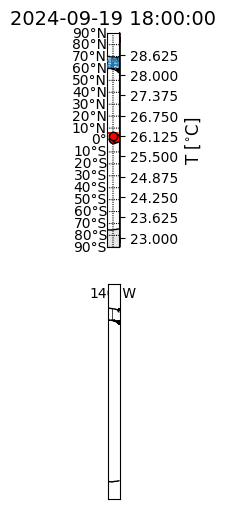

In [9]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from matplotlib import rc
import matplotlib.cm as cm
import cmocean

for i in range(56, u.shape[0], 1):
    fig = plt.figure(figsize=(8, 14))
    rc('font', size=10)
    rc('font', weight='normal')
    rc('xtick', labelsize=10)
    rc('ytick', labelsize=10)
    grd = GridSpec(150, 150)

    # First subplot
    ax = fig.add_subplot(grd[0:30, :])
    plt.title(str(timev[i]), weight='normal', fontsize=14)

    # Initialize Basemap with PlateCarree equivalent projection
    m = Basemap(projection='cyl', llcrnrlon=-145, urcrnrlon=-135, llcrnrlat=-90, urcrnrlat=90, resolution='l', ax=ax)
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    m.drawrivers(color='C0', linewidth=1, zorder=8)
    m.fillcontinents(color='0.9')

    # Add grid lines
    parallels = np.arange(-90., 91., 10.)
    meridians = np.arange(-180., 181., 10.)
    m.drawparallels(parallels, labels=[1, 0, 0, 0], linewidth=0.8, color='k', alpha=1)
    m.drawmeridians(meridians, labels=[0, 0, 0, 1], linewidth=0.8, color='k', alpha=1)

    # Contour plot
    lon_mesh, lat_mesh = np.meshgrid(lon, lat)
    cf = m.contourf(lon_mesh, lat_mesh, temp[i], np.arange(23, 29.025, 0.025), cmap='RdYlBu_r', extend='both')
    plt.scatter([-140, -137.83, -140], [0.5, 1.75, 3], color='red', edgecolor='k', zorder=10)
    cbar = m.colorbar(cf, location='right', pad="5%")
    cbar.set_label(r'T [$^{\circ}$C]', weight='normal', fontsize=12)
    plt.scatter(lonp[:, i-56], latp[:, i-56], color='yellow', edgecolor='k', s=10)

    # Second subplot
    ax = fig.add_subplot(grd[35:65, :])
    m = Basemap(projection='cyl', llcrnrlon=-145, urcrnrlon=-135, llcrnrlat=-90, urcrnrlat=90, resolution='l', ax=ax)
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    m.drawrivers(color='C0', linewidth=1, zorder=8)
    m.fillcontinents(color='0.9')

    # Grid lines
    m.drawparallels(parallels, labels=[1, 0, 0, 0], linewidth=0.8, color='k', alpha=1)
    m.drawmeridians(meridians, labels=[0, 0, 0, 1], linewidth=0.8, color='k', alpha=1)

    # Contour plot for zeta
#     lon_mesh, lat_mesh = np.meshgrid(LON, LAT)
#     cf = m.contourf(lon_mesh, lat_mesh, zeta[i]/sw.f(3.5), np.arange(-3, 3.25, 0.25), cmap=cmocean.cm.balance, extend='both')
#     plt.scatter([-140, -137.83, -140], [0.5, 1.75, 3], color='red', edgecolor='k', zorder=10)
#     cbar = m.colorbar(cf, location='right', pad="5%")
#     cbar.set_label('$\\zeta$/$f$', weight='normal', fontsize=12)
#     plt.scatter(lonp[:, i-56], latp[:, i-56], color='yellow', edgecolor='k', s=10)

    # Save the figure
    plt.savefig(f'/Users/michal/Data/{timev[i]}.png', bbox_inches='tight', dpi=400)
    plt.close()


In [5]:
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

for i in range(56,u.shape[0],1):
    fig=plt.figure(figsize=(8,14))
    rc('font',size=10)    
    rc('font',weight='normal') 
    rc('xtick',labelsize=10)  
    rc('ytick',labelsize=10)
    grd = GridSpec(150,150)

    ax = fig.add_subplot(grd[0:30,:],projection=ccrs.PlateCarree())
    plt.title(str(timev[i]),weight='normal',fontsize=14)
    ax.coastlines()
    ax.add_feature(cfeature.LAND, facecolor='0.9') 
    ax.add_feature(cfeature.COASTLINE, zorder=11) 
    ax.add_feature(cfeature.STATES,zorder=12,linewidth=0.2)
    ax.add_feature(cfeature.RIVERS, edgecolor='C0',linewidth=1,zorder=8)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=0.8,color='k',alpha=1, linestyle='dotted',zorder=13)
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'weight': 'normal'}
    gl.ylabel_style = {'size': 10, 'weight': 'normal'}
    # gl.xlocator = mticker.FixedLocator([-43,-42,-41,-40,-39,-38])
    # gl.ylocator = mticker.FixedLocator([-25,-24,-23,-22,-21])
    cf=plt.contourf(lon,lat,temp[i],np.arange(23,29.025,0.025),cmap='RdYlBu_r',extend='both')
    plt.scatter([-140,-137.83,-140],[0.5,1.75,3],color='red',edgecolor='k')
    cbar=plt.colorbar(cf)
    cbar.set_label(r'T [$^{\circ}$C]',weight='normal',fontsize=12)
    plt.grid()
    plt.xlim(-145,-135)
    plt.scatter(lonp[:,i-56],latp[:,i-56],color='yellow',edgecolor='k',s=10)

    ax = fig.add_subplot(grd[35:65,:],projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.LAND, facecolor='0.9') 
    ax.add_feature(cfeature.COASTLINE, zorder=11) 
    ax.add_feature(cfeature.STATES,zorder=12,linewidth=0.2)
    ax.add_feature(cfeature.RIVERS, edgecolor='C0',linewidth=1,zorder=8)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=0.8,color='k',alpha=1, linestyle='dotted',zorder=13)
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'weight': 'normal'}
    gl.ylabel_style = {'size': 10, 'weight': 'normal'}
    # gl.xlocator = mticker.FixedLocator([-43,-42,-41,-40,-39,-38])
    # gl.ylocator = mticker.FixedLocator([-25,-24,-23,-22,-21])
    cf=plt.contourf(LON,LAT,zeta[i]/sw.f(3.5),np.arange(-3,3.25,0.25),cmap=cm.balance,extend='both')
    plt.scatter([-140,-137.83,-140],[0.5,1.75,3],color='red',edgecolor='k')
    cbar=plt.colorbar(cf)
    cbar.set_label('$\zeta$/$f$',weight='normal',fontsize=12)
    plt.grid()
    plt.xlim(-145,-135)
    plt.scatter(lonp[:,i-56],latp[:,i-56],color='yellow',edgecolor='k',s=10)

    plt.savefig('/Users/michal/Data/'+str(timev[i])+'.png',bbox_inches='tight',dpi=400)
    plt.close()
    

NameError: name 'ccrs' is not defined

<Figure size 800x1400 with 0 Axes>

In [22]:
import cv2
import os

def convert_images_to_video(input_folder, output_file, fps):
    # Get the list of image files in the input folder
    image_files = sorted([f for f in os.listdir(input_folder) if f.endswith('.jpg') or f.endswith('.png')])

    # Read the first image to get its dimensions
    first_image = cv2.imread(os.path.join(input_folder, image_files[0]))
    height, width, _ = first_image.shape

    # Create a VideoWriter object to save the video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specify the codec for the output video file
    video = cv2.VideoWriter(output_file, fourcc, fps, (width, height))

    # Iterate over each image and write it to the video
    for image_file in image_files:
        image_path = os.path.join(input_folder, image_file)
        frame = cv2.imread(image_path)
        video.write(frame)

    # Release the video writer and close the video file
    video.release()
    cv2.destroyAllWindows()

In [24]:
# Provide the path to the input image folder, output video file, and desired FPS
input_folder = r'/Users/caiquediasluko/Documents/Caique/MOTIVE/Wirewalker_Forecast/Forecast1/'
output_file = r'/Users/caiquediasluko/Documents/Caique/MOTIVE/Wirewalker_Forecast/Forecast1.mp4'
fps = 3  # Frames per second

# Call the function to convert the images to video
convert_images_to_video(input_folder, output_file, fps)

Nov 1 depart
6.2 days of transit
Nov 7 start WW deployment
Nov 27 start WW reovery
Nov 29 night start transit back
5 days of transit
Dec 3 arrive in Honolulu
